In [1]:
import re    # for regular expressions 
import nltk  # for text manipulation  
import string #for string manipulations
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

%matplotlib inline

In [2]:
train = pd.read_csv(r'C:\Users\PUNEETH HR\Downloads\train_E6oV3lV.csv') 
test = pd.read_csv(r'C:\Users\PUNEETH HR\Downloads\test_tweets_anuFYb8.csv')

In [3]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


In [4]:
train[train['label']==0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo
6,7,0,@user camping tomorrow @user @user @user @user @user @user @user dannyâ¦
7,8,0,the next school year is the year for exams.ð¯ can't think about that ð­ #school #exams #hate #imagine #actorslife #revolutionschool #girl
8,9,0,we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers â¦
9,10,0,@user @user welcome here ! i'm it's so #gr8 !


In [5]:
train[train['label']==1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot
14,15,1,no comment! in #australia #opkillingbay #seashepherd #helpcovedolphins #thecove #helpcovedolphins
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'd need something like this. again. #neverump #xenophobia
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk folx running around loving themselves and promoting our greatness
77,78,1,"@user hey, white people: you can call people 'white' by @user #race #identity #medâ¦"
82,83,1,how the #altright uses &amp; insecurity to lure men into #whitesupremacy
111,112,1,@user i'm not interested in a #linguistics that doesn't address #race &amp; . racism is about #power. #raciolinguistics bringsâ¦


In [6]:
train.shape,test.shape

((31962, 3), (17197, 2))

In [7]:
train['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

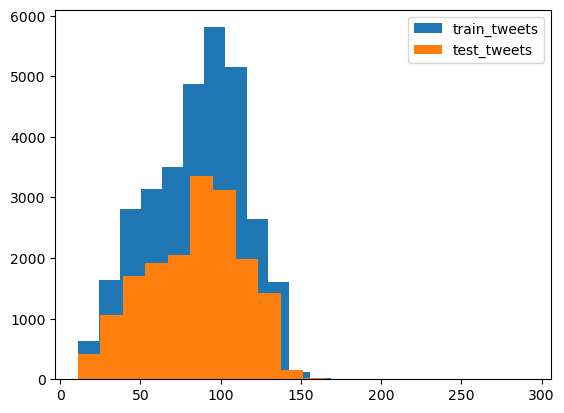

In [8]:
train_length = train['tweet'].str.len()
test_length = test['tweet'].str.len()
plt.hist(train_length,bins=20,label="train_tweets")
plt.hist(test_length,bins=20,label="test_tweets")
plt.legend()
plt.show()

In [9]:
??plt.hist

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    *,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

In [10]:

combi = pd.concat([train, test], ignore_index=True, sort=False)
combi.shape


(49159, 3)

In [11]:
def remove_pattern(input_txt,pattern):
    r = re.findall(pattern,input_txt)
    for i in r:
        input_txt = re.sub(i,'',input_txt)
    return input_txt    

In [12]:
combi = pd.concat([train, test], ignore_index=True, sort=False)

# Print column names to check before dropping
print("Columns before dropping:", combi.columns)

# Drop 'tidy_tweet' column safely
combi.drop(['tidy_tweet'], axis=1, inplace=True, errors='ignore')

# Print column names after dropping
print("Columns after dropping:", combi.columns)

# Display first few rows
print(combi.head())

Columns before dropping: Index(['id', 'label', 'tweet'], dtype='object')
Columns after dropping: Index(['id', 'label', 'tweet'], dtype='object')
   id  label  \
0   1    0.0   
1   2    0.0   
2   3    0.0   
3   4    0.0   
4   5    0.0   

                                                                                                                        tweet  
0                       @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run  
1  @user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked  
2                                                                                                         bihday your majesty  
3                                      #model   i love u take with u all the time in urð±!!! ððððð¦ð¦ð¦    
4                                                                                      factsguide: society now    #mot

In [13]:
?np.vectorize

Init signature:
np.vectorize(
    pyfunc=<no value>,
    otypes=None,
    doc=None,
    excluded=None,
    cache=False,
    signature=None,
)
Docstring:     
vectorize(pyfunc=np._NoValue, otypes=None, doc=None, excluded=None,
cache=False, signature=None)

Returns an object that acts like pyfunc, but takes arrays as input.

Define a vectorized function which takes a nested sequence of objects or
numpy arrays as inputs and returns a single numpy array or a tuple of numpy
arrays. The vectorized function evaluates `pyfunc` over successive tuples
of the input arrays like the python map function, except it uses the
broadcasting rules of numpy.

The data type of the output of `vectorized` is determined by calling
the function with the first element of the input.  This can be avoided
by specifying the `otypes` argument.

Parameters
----------
pyfunc : callable, optional
    A python function or method.
    Can be omitted to produce a decorator with keyword arguments.
otypes : str or list of dt

In [14]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*") 
combi.head()

<>:1: SyntaxWarning: invalid escape sequence '\w'
<>:1: SyntaxWarning: invalid escape sequence '\w'
C:\Users\PUNEETH HR\AppData\Local\Temp\ipykernel_1656\2711925487.py:1: SyntaxWarning: invalid escape sequence '\w'
  combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\w]*")


,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [15]:
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet'], "@[\\w]*")  # ✅ Using double backslash


In [16]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [17]:
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [18]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split()  if len(w)>3]))
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction. #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit can't cause they don't offer wheelchair vans pdx. #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time urð±!!! ðððð ð¦ð¦ð¦
4,5,0.0,factsguide: society now #motivation,factsguide: society #motivation


In [19]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                   [when, father, dysfunctional, selfish, drags, kids, into, dysfunction., #run]
1    [thanks, #lyft, credit, can't, cause, they, don't, offer, wheelchair, vans, pdx., #disapointed, #getthanked]
2                                                                                         [bihday, your, majesty]
3                                      [#model, love, take, with, time, urð±!!!, ðððð, ð¦ð¦ð¦]
4                                                                             [factsguide:, society, #motivation]
Name: tidy_tweet, dtype: object

In [20]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])

for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
combi['tidy_tweet'] = tokenized_tweet    

In [21]:
!pip install wordcloud

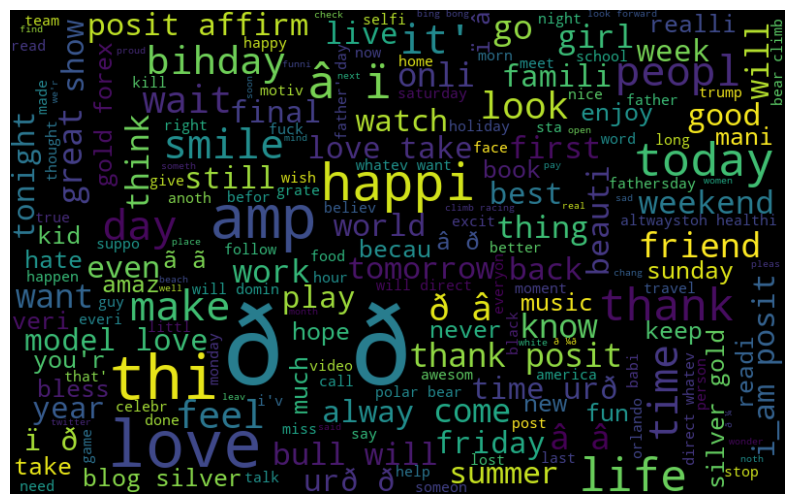

In [22]:
all_words = ' '.join([text for text in combi['tidy_tweet']]) 
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

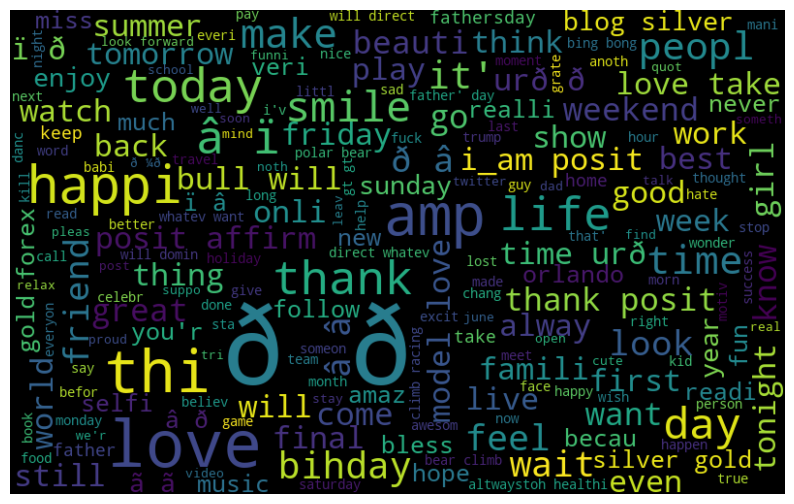

In [23]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]]) 
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off')
plt.show()

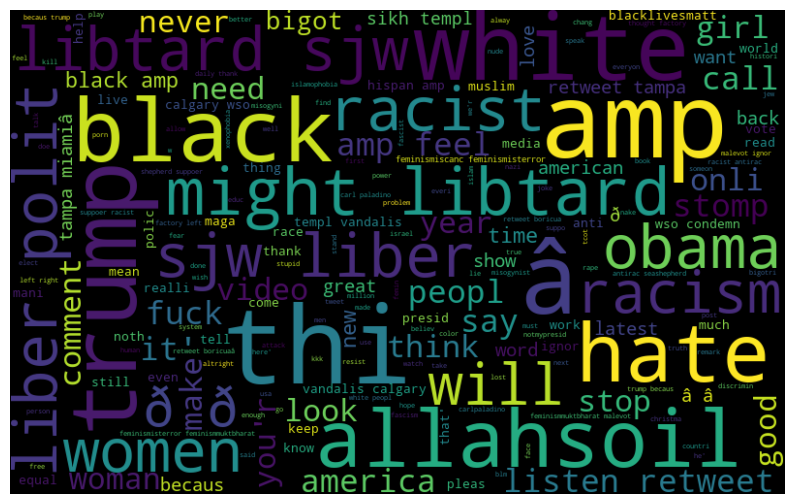

In [24]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words) 
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [25]:
def hashtag_extract(x):    
    hashtags = []  
      
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)     
    return hashtags

In [26]:
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

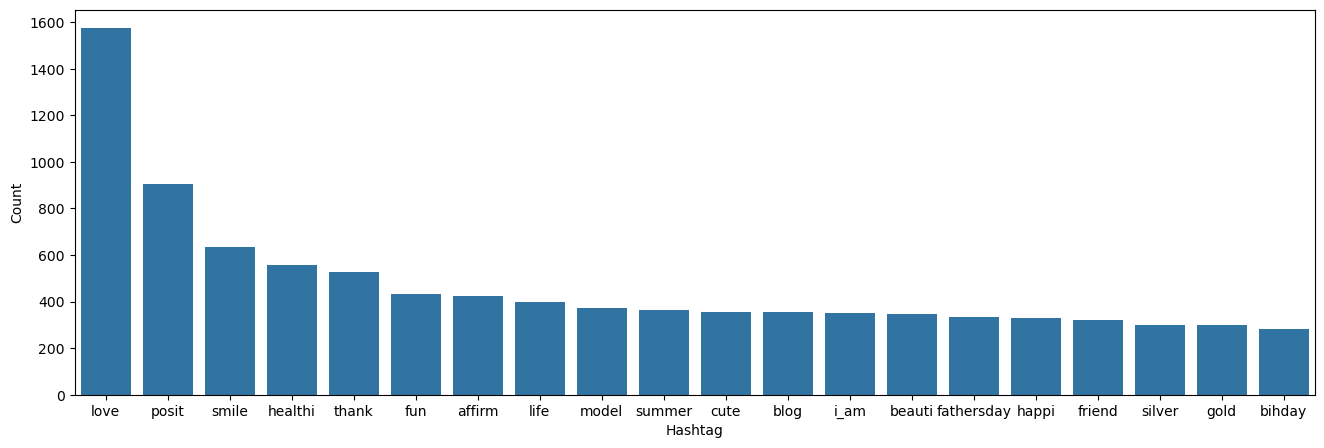

In [27]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()), 'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count') 
plt.show()

In [28]:
b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

In [29]:
pip install gensim

Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import gensim

In [31]:
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])
bow.shape

(49159, 1000)

In [32]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english') 
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])
tfidf.shape

(49159, 1000)

In [33]:
import gensim
import gensim.models

# Ensure 'tidy_tweet' column has no NaN values before splitting
combi['tidy_tweet'] = combi['tidy_tweet'].fillna("")

# Tokenize the tweets
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split()).values.tolist()

# Train the Word2Vec model
model_w2v = gensim.models.Word2Vec(
    sentences=tokenized_tweet,
    vector_size=200, 
    window=5,  # Context window size
    min_count=2,  # Ignores words with frequency < 2
    sg=1,  # 1 for skip-gram model, 0 for CBOW
    hs=0,  # Hierarchical softmax (0 = negative sampling)
    negative=10,  # Negative sampling
    workers=2,  # Number of CPU cores to use
    seed=34
)

# Train the model
model_w2v.train(tokenized_tweet, total_examples=len(tokenized_tweet), epochs=20)


(6705804, 8184140)

In [34]:
model_w2v.wv.most_similar(positive="dinner")

[('spaghetti', 0.6437694430351257),
 ('shopping!', 0.605580747127533),
 ('#biall2016', 0.5898703336715698),
 ('lukey', 0.5876150727272034),
 ('sister!!', 0.5818274021148682),
 ('bay.', 0.5765945315361023),
 ('nana', 0.5669710040092468),
 ('#brunch', 0.5667247772216797),
 ('gown', 0.5665162205696106),
 ('bondi', 0.5655832886695862)]

In [35]:
model_w2v.wv.most_similar(positive='trump')

[('fraud.', 0.5708715319633484),
 ('rally.', 0.5594773292541504),
 ('phony.', 0.5583415627479553),
 ('donald', 0.5579474568367004),
 ('suppoer.', 0.5555707812309265),
 ('presidential.', 0.5546202659606934),
 ('sexist.', 0.5498142838478088),
 ('businessman:', 0.5483931303024292),
 ('churchil', 0.5469651222229004),
 ('jibe', 0.5420427918434143)]

In [36]:
model_w2v.wv['food']


array([-5.64325377e-02, -4.37206358e-01, -4.04703384e-03,  6.15427017e-01,
       -2.60186940e-01, -7.48674124e-02, -6.44602031e-02, -9.45841312e-01,
        3.53112251e-01,  5.21501899e-01, -1.56609252e-01,  1.32964417e-01,
        1.56704232e-01, -6.62816107e-01, -1.19878322e-01,  7.01117814e-01,
        3.84457916e-01,  7.87667334e-01, -1.82271123e-01, -3.76567543e-01,
       -9.82546329e-01,  7.14721859e-01,  2.86463220e-02, -6.01316631e-01,
       -2.77676195e-01,  5.03506124e-01,  2.42068600e-02, -3.79022032e-01,
       -6.48679197e-01, -3.93513262e-01, -9.50231180e-02, -3.63319933e-01,
        1.21922486e-01,  2.27610186e-01, -2.69790813e-02, -6.95750117e-02,
        3.05509925e-01,  6.37772977e-01,  4.27490294e-01,  1.06782705e-01,
       -8.19138646e-01, -1.38617784e-01,  3.76595765e-01, -3.20479721e-01,
       -2.40799069e-01, -2.51280576e-01,  7.45137632e-01, -5.60937785e-02,
       -1.08270178e-04,  6.24544285e-02,  1.61024585e-01,  3.73408496e-01,
       -3.08399856e-01, -

In [37]:
len(model_w2v.wv['food'])

200

In [38]:
import numpy as np
import pandas as pd

def word_vector(tokens, size):
    vec = np.zeros(size).reshape((1, size))
    count = 0
    for word in tokens:
        try:
            vec += model_w2v.wv[word].reshape((1, size))  # ✅ Use model_w2v.wv[word]
            count += 1
        except KeyError:
            # Handling the case where the token is not in vocabulary
            continue
    if count != 0:
        vec /= count
    return vec  # ✅ Ensure return statement is outside the loop

# Initialize an array to store word vectors
wordvec_arrays = np.zeros((len(tokenized_tweet), 200))  

# Generate word vectors for each tokenized tweet
for i in range(len(tokenized_tweet)):
    wordvec_arrays[i, :] = word_vector(tokenized_tweet[i], 200)

# Convert to DataFrame
wordvec_df = pd.DataFrame(wordvec_arrays)

# Print shape of final word vector dataframe
print(wordvec_df.shape)


(49159, 200)


In [39]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [41]:
from gensim.models.doc2vec import TaggedDocument 

sentences = [TaggedDocument(words=tokens, tags=[str(i)]) for i, tokens in enumerate(tokenized_tweet)]


In [44]:
from gensim.models.doc2vec import TaggedDocument  

def add_label(twt):
    output = []
    for i, s in enumerate(twt):  
        output.append(TaggedDocument(words=s, tags=["tweet_" + str(i)]))  
    return output

# Correct way to call the function
labeled_tweets = add_label(tokenized_tweet)  



In [45]:
labeled_tweets[:6]

[TaggedDocument(words=['when', 'father', 'dysfunct', 'selfish', 'drag', 'kid', 'into', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['thank', '#lyft', 'credit', "can't", 'caus', 'they', "don't", 'offer', 'wheelchair', 'van', 'pdx.', '#disapoint', '#getthank'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesti'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'love', 'take', 'with', 'time', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'societi', '#motiv'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fare', 'talk', 'befor', 'they', 'leave.', 'chao', 'disput', 'when', 'they', 'there.', '#allshowandnogo'], tags=['tweet_5'])]

In [47]:
from gensim.models import Doc2Vec
from tqdm import tqdm

model_d2v = Doc2Vec(dm=1,   # 'distributed memory' model
                    dm_mean=1,  # use mean of the context word vectors
                    vector_size=200,  
                    window=5, 
                    negative=7,  
                    min_count=5,  
                    workers=3,  
                    alpha=0.1,  
                    seed=23)

# ✅ Build vocabulary
model_d2v.build_vocab([i for i in tqdm(labeled_tweets)])

# ✅ Train the model
model_d2v.train(labeled_tweets, total_examples=len(labeled_tweets), epochs=15)


100%|██████████| 49159/49159 [00:00<00:00, 3677131.42it/s]


In [48]:
docvec_arrays = np.zeros((len(tokenized_tweet), 200)) 
for i in range(len(combi)):
    docvec_arrays[i,:] = model_d2v.docvecs[i].reshape((1,200))    

docvec_df = pd.DataFrame(docvec_arrays) 
docvec_df.shape

(49159, 200)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [50]:
# Extracting train and test BoW features
train_bow = bow[:31962,:] 
test_bow = bow[31962:,:] 
# splitting data into training and validation set 
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression() 
# # training the model
lreg.fit(xtrain_bow, ytrain) 
# prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
# prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0 
# prediction_int = prediction_int.astype(np.int) 
# f1_score(yvalid, prediction_int) # calculating f1 score for the validation set

LogisticRegression()

In [52]:
import numpy as np

test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:, 1] >= 0.3  
test_pred_int = test_pred_int.astype(int) 

test['label'] = test_pred_int  
submission = test[['id', 'label']]  
submission.to_csv('sub_lreg_bow.csv', index=False) 


In [53]:

from sklearn.metrics import f1_score

# Splitting TF-IDF feature matrix
train_tfidf = tfidf[:31962, :]
test_tfidf = tfidf[31962:, :]

# Ensure correct indexing
xtrain_tfidf = train_tfidf[ytrain.index.to_list(), :]  #  Convert index to list if needed
xvalid_tfidf = train_tfidf[yvalid.index.to_list(), :]

# Train Logistic Regression model
lreg.fit(xtrain_tfidf, ytrain)

# Predict probabilities
prediction = lreg.predict_proba(xvalid_tfidf)

# Convert probabilities to binary labels
prediction_int = prediction[:, 1] >= 0.3
prediction_int = prediction_int.astype(int)  # Replace `np.int` with `int`

# Compute F1-score
f1 = f1_score(yvalid, prediction_int)
print(f"F1 Score: {f1}")


F1 Score: 0.5407279029462738


In [54]:
train_w2v = wordvec_df.iloc[:31962,:] 
test_w2v = wordvec_df.iloc[31962:,:] 
xtrain_w2v = train_w2v.iloc[ytrain.index,:]
xvalid_w2v = train_w2v.iloc[yvalid.index,:]

In [55]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 3.0 MB/s eta 0:00:42
    --------------------------------------- 1.6/124.9 MB 3.0 MB/s eta 0:00:42
    --------------------------------------- 2.6/124.9 MB 3.5 MB/s eta 0:00:35
   - -------------------------------------- 3.7/124.9 MB 3.8 MB/s eta 0:00:32
   - -------------------------------------- 4.5/124.9 MB 3.9 MB/s eta 0:00:31
   - -------------------------------------- 5.5/124.9 MB 4.0 MB/s eta 0:00:30
   -- ------------------------------------- 6.8/124.9 MB 4.3 MB/s eta 0:00:28
   -- ------------------------------------- 8.1/124.9 MB 4.6 MB/s eta 0:00:26
   --- ------------------------------------ 9.7/124.9 MB 4.9 MB/s eta 0:00:24
   --- ------------------------------------ 11.3/124.9 MB 5.1 MB/s eta 0:00:23
   ---- ----------------------------------- 12.8/124.9 MB 5.3 MB/s eta 0:00:2

In [57]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Train XGBoost model
xgb_model = XGBClassifier(max_depth=6, n_estimators=1000)
xgb_model.fit(xtrain_bow, ytrain)  

# Predict on validation set
prediction = xgb_model.predict(xvalid_bow)  

# Compute F1-score
f1 = f1_score(yvalid, prediction)
print(f"F1 Score: {f1}")


F1 Score: 0.5411764705882353


In [58]:
# Predict on the test set
test_pred = xgb_model.predict(test_bow)

# Ensure test dataframe has 'id' column before assignment
if 'id' in test.columns:
    test['label'] = test_pred
    submission = test[['id', 'label']]
    
    # Save submission file
    submission.to_csv('sub_xgb_bow.csv', index=False)
    print("Submission file saved successfully as 'sub_xgb_bow.csv'.")
else:
    print("Error: 'id' column not found in the test dataframe.")


Submission file saved successfully as 'sub_xgb_bow.csv'.


In [59]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Train XGBoost model
xgb = XGBClassifier(max_depth=6, n_estimators=1000, random_state=42)
xgb.fit(xtrain_tfidf, ytrain)

# Predict on validation set
prediction = xgb.predict(xvalid_tfidf)

# Compute F1-score
f1 = f1_score(yvalid, prediction)
print(f"F1 Score: {f1:.4f}")  # Print result with 4 decimal places


F1 Score: 0.5319


In [60]:


# Train XGBoost model
xgb = XGBClassifier(max_depth=6, n_estimators=1000, n_jobs=3, random_state=42)
xgb.fit(xtrain_w2v, ytrain)

# Predict on validation set
prediction = xgb.predict(xvalid_w2v)

# Compute F1-score
f1 = f1_score(yvalid, prediction)
print(f"F1 Score: {f1:.4f}")


F1 Score: 0.6165


In [61]:
import xgboost as xgb

# Convert datasets into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(xtrain_w2v, label=ytrain)
dvalid = xgb.DMatrix(xvalid_w2v, label=yvalid)
dtest = xgb.DMatrix(test_w2v)

# XGBoost parameters (tunable)
params = {
    'objective': 'binary:logistic',  # Binary classification problem
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.3,  # Learning rate
    'subsample': 1,
    'colsample_bytree': 1,
    'random_state': 42  # Ensuring reproducibility
}


In [63]:
# Train the model with early stopping to avoid overfitting
xgb_model = xgb.train(
    params, 
    dtrain, 
    num_boost_round=1000, 
    evals=[(dtrain, 'train'), (dvalid, 'eval')],  # Explicitly using `evals=`
    early_stopping_rounds=50, 
    verbose_eval=10
)



[0]	train-logloss:0.23312	eval-logloss:0.24350
[10]	train-logloss:0.09443	eval-logloss:0.14662
[20]	train-logloss:0.06139	eval-logloss:0.13786
[30]	train-logloss:0.04315	eval-logloss:0.13719
[40]	train-logloss:0.03044	eval-logloss:0.13860
[50]	train-logloss:0.02135	eval-logloss:0.14262
[60]	train-logloss:0.01474	eval-logloss:0.14507
[70]	train-logloss:0.01067	eval-logloss:0.14990
[80]	train-logloss:0.00783	eval-logloss:0.15399
[82]	train-logloss:0.00735	eval-logloss:0.15501


In [64]:
import numpy as np
from sklearn.metrics import f1_score

def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(int)  # Fix: Use `astype(int)` instead of `astype(np.int)`
    preds = (preds >= 0.3).astype(int)  # Fix: Use `astype(int)`
    return 'f1_score', float(f1_score(labels, preds))  # Fix: Return a single tuple


In [67]:
from sklearn.metrics import f1_score
import numpy as np

# Define a custom evaluation function
def custom_eval(preds, dtrain):
    labels = dtrain.get_label().astype(int)  # Ensure labels are integer
    preds = (preds >= 0.3).astype(int)  # Convert probabilities to binary labels
    f1 = f1_score(labels, preds)  # Compute F1-score
    return 'f1_score', f1  # ✅ Return a tuple (name, value)

# Grid search parameters
gridsearch_params = [
    (max_depth, min_child_weight)
    for max_depth in range(6, 10)
    for min_child_weight in range(5, 8)
]

max_f1 = 0.0  # Initialize best F1 score
best_params = None  # Store best parameters

# Grid Search
for max_depth, min_child_weight in gridsearch_params:
    print(f"CV with max_depth={max_depth}, min_child_weight={min_child_weight}")

    # Update params dictionary
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight

    # Perform cross-validation
    cv_results = xgb.cv(
        params,
        dtrain,
        feval=custom_eval,  # ✅ FIX: Use feval instead of custom_metric
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )

    # Find best F1 score
    mean_f1 = cv_results['test-f1_score-mean'].max()  # ✅ FIX: Use correct metric key
    boost_rounds = np.argmax(cv_results['test-f1_score-mean'])  # ✅ FIX: Use `np.argmax()`

    print(f"\tF1 Score {mean_f1} for {boost_rounds} rounds")

    # Update best parameters if better F1 score is found
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (max_depth, min_child_weight)

# Print final best parameters
print(f"Best params: max_depth={best_params[0]}, min_child_weight={best_params[1]}, F1 Score: {max_f1}")



CV with max_depth=6, min_child_weight=5


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.6105898 for 85 rounds
CV with max_depth=6, min_child_weight=6


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.6133276 for 126 rounds
CV with max_depth=6, min_child_weight=7


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.6155921999999999 for 106 rounds
CV with max_depth=7, min_child_weight=5


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.5939719999999999 for 53 rounds
CV with max_depth=7, min_child_weight=6


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.6286607999999999 for 145 rounds
CV with max_depth=7, min_child_weight=7


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.6096724 for 59 rounds
CV with max_depth=8, min_child_weight=5


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.6134232000000001 for 67 rounds
CV with max_depth=8, min_child_weight=6


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.6134004 for 62 rounds
CV with max_depth=8, min_child_weight=7


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.5942326 for 45 rounds
CV with max_depth=9, min_child_weight=5


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.5931422000000001 for 39 rounds
CV with max_depth=9, min_child_weight=6


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.606006 for 46 rounds
CV with max_depth=9, min_child_weight=7


C:\Users\PUNEETH HR\anaconda4\Lib\site-packages\xgboost\training.py:38: UserWarning: `feval` is deprecated, use `custom_metric` instead.  They have different behavior when custom objective is also used.See https://xgboost.readthedocs.io/en/latest/tutorials/custom_metric_obj.html for details on the `custom_metric`.
  warnings.warn(


	F1 Score 0.6172372 for 98 rounds
Best params: max_depth=7, min_child_weight=6, F1 Score: 0.6286607999999999


In [68]:
params.pop("feval", None)  # Ensure feval is not in params


In [69]:
params['max_depth'] = 9 
params['min_child_weight'] = 7

In [70]:
gridsearch_params = [
    (subsample, colsample)
    for subsample in [i/10. for i in range(5, 10)]
    for colsample in [i/10. for i in range(5, 10)]
]

max_f1 = 0. 
best_params = None 

for subsample, colsample in gridsearch_params:
    print("CV with subsample={}, colsample_bytree={}".format(subsample, colsample))
    
    # Update parameters
    params['colsample_bytree'] = colsample  # ✅ Fixed parameter name
    params['subsample'] = subsample
    
    # Perform cross-validation
    params.pop("feval", None)  # ✅ Ensure `feval` is removed
    cv_results = xgb.cv(
        params,
        dtrain,
        custom_metric=custom_eval,  # ✅ Use `custom_metric`
        num_boost_round=200,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=10
    )
    
    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()
    
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = (subsample, colsample) 

print("Best params: subsample={}, colsample_bytree={}, F1 Score: {}".format(best_params[0], best_params[1], max_f1))



CV with subsample=0.5, colsample_bytree=0.5
	F1 Score 0.6240154 for 71 rounds
CV with subsample=0.5, colsample_bytree=0.6
	F1 Score 0.6289816 for 74 rounds
CV with subsample=0.5, colsample_bytree=0.7
	F1 Score 0.6202494000000001 for 48 rounds
CV with subsample=0.5, colsample_bytree=0.8
	F1 Score 0.5996651999999999 for 16 rounds
CV with subsample=0.5, colsample_bytree=0.9
	F1 Score 0.6262648 for 59 rounds
CV with subsample=0.6, colsample_bytree=0.5
	F1 Score 0.6354336 for 69 rounds
CV with subsample=0.6, colsample_bytree=0.6
	F1 Score 0.6449484 for 88 rounds
CV with subsample=0.6, colsample_bytree=0.7
	F1 Score 0.6260966 for 45 rounds
CV with subsample=0.6, colsample_bytree=0.8
	F1 Score 0.6148498 for 31 rounds
CV with subsample=0.6, colsample_bytree=0.9
	F1 Score 0.6348980000000001 for 61 rounds
CV with subsample=0.7, colsample_bytree=0.5
	F1 Score 0.6370022 for 59 rounds
CV with subsample=0.7, colsample_bytree=0.6
	F1 Score 0.6520883999999999 for 84 rounds
CV with subsample=0.7, colsa

In [71]:
params['subsample'] = .9 
params['colsample_bytree'] = .5

In [73]:
max_f1 = 0. 
best_params = None 

for eta in [.3, .2, .1, .05, .01, .005]:
    print("CV with eta={}".format(eta))
    
    # Update ETA
    params['eta'] = eta

    # Run CV
    cv_results = xgb.cv(
        params,
        dtrain,
        custom_metric= custom_eval,  # ✅ FIXED
        num_boost_round=1000,
        maximize=True,
        seed=16,
        nfold=5,
        early_stopping_rounds=20
    )

    # Finding best F1 Score
    mean_f1 = cv_results['test-f1_score-mean'].max()
    boost_rounds = cv_results['test-f1_score-mean'].idxmax()  # ✅ FIXED
    print("\tF1 Score {} for {} rounds".format(mean_f1, boost_rounds))
    
    if mean_f1 > max_f1:
        max_f1 = mean_f1
        best_params = eta 

print("Best params: {}, F1 Score: {}".format(best_params, max_f1))


CV with eta=0.3
	F1 Score 0.6392218 for 83 rounds
CV with eta=0.2
	F1 Score 0.6490452000000001 for 92 rounds
CV with eta=0.1
	F1 Score 0.6553228000000001 for 75 rounds
CV with eta=0.05
	F1 Score 0.6590665999999998 for 185 rounds
CV with eta=0.01
	F1 Score 0.6458202 for 533 rounds
CV with eta=0.005
	F1 Score 0.0 for 0 rounds
Best params: 0.05, F1 Score: 0.6590665999999998


In [74]:
# Updating the learning rate
params['eta'] = 0.2

# Remove redundant 'colsample' key (if it exists)
params.pop('colsample', None)

# Print updated params
print(params)


{'objective': 'binary:logistic', 'max_depth': 9, 'min_child_weight': 7, 'eta': 0.2, 'subsample': 0.9, 'colsample_bytree': 0.5, 'random_state': 42}


In [77]:
xgb_model = xgb.train(
    params,
    dtrain,
    num_boost_round=1000,
    maximize=True,
    evals=[(dvalid, "Validation")],
    early_stopping_rounds=10,
    custom_metric=custom_eval  # 
)


[0]	Validation-logloss:0.25443	Validation-f1_score:0.20519
[1]	Validation-logloss:0.23162	Validation-f1_score:0.35690
[2]	Validation-logloss:0.21284	Validation-f1_score:0.45142
[3]	Validation-logloss:0.19888	Validation-f1_score:0.49180
[4]	Validation-logloss:0.18747	Validation-f1_score:0.50694
[5]	Validation-logloss:0.17813	Validation-f1_score:0.53237
[6]	Validation-logloss:0.17035	Validation-f1_score:0.54707
[7]	Validation-logloss:0.16442	Validation-f1_score:0.55371
[8]	Validation-logloss:0.15994	Validation-f1_score:0.55778
[9]	Validation-logloss:0.15602	Validation-f1_score:0.57265
[10]	Validation-logloss:0.15302	Validation-f1_score:0.57774
[11]	Validation-logloss:0.14976	Validation-f1_score:0.58487
[12]	Validation-logloss:0.14749	Validation-f1_score:0.58508
[13]	Validation-logloss:0.14558	Validation-f1_score:0.58257
[14]	Validation-logloss:0.14401	Validation-f1_score:0.59721
[15]	Validation-logloss:0.14252	Validation-f1_score:0.59429
[16]	Validation-logloss:0.14137	Validation-f1_scor

In [76]:
test_pred = xgb_model.predict(dtest)